# GPHY 491-591: Lab 3

Written by Cascade Tuholske, Jan. 2024

![Richmond](./assets/richmond.png)

## Goals
The goal of Lab 3 is to use our new knowledge of `Pandas`, `GeoPandas` and `Rasterio` to create a human-environment geospatial data to investigate the relationship between socioeconomic status, green space, and temperature in Los Angeles, California. In urban areas, the distribution of materials such as asphalt and concrete has been shown to lead to higher surface and air temperatures compared to rural counterparts. This is known as the urban heat island (UHI) effect. High temperatures can be harmful to the health of residents, and in order to mitigate the UHI cities adopt strategies like increasing tree cover to increase shade and cooling, or increasing the reflectivity, also called albedo, with white paint. 

It has been shown that within most cities, the UHI and exposure to extreme heat is most pronounced in neighbhorhoods who house the most structuralized margalized. The image above is from a wonderful [article](https://www.nytimes.com/interactive/2020/08/24/climate/racism-redlining-cities-global-warming.html) in the New York Times about racist redlining policies, green space, and heat exposure in Richmond, VA. **The question is: how are datasets like the one used in this article created?**

To answer this question, you will combine demographic and socioeconomic data from the LA Times ([read about it here](http://maps.latimes.com/neighborhoods)) and remote sensed data from [Landsat satellites](https://landsat.gsfc.nasa.gov). Not only will you become familiar with a suite of Python tools, you will learn about a bit about physics, spatial uncertainty, demography, and environmental justice. In  short, you will assemble and analyze a dataset that captures a snapshot of approximate average midday temperatures in May and August, the amount of vegetation, and a host of social/economic data across each neighborhood in the county of Los Angeles. 

In terms of new Python tools, you will be given a series of custom [functions](https://www.codecademy.com/learn/cspath-cs-101/modules/cspath-python-functions/cheatsheet). We will cover functions in detail in lecture, but I want to give you a chance to see what they are and how they will speed up your code. Don't worry if they don't fully make sense.

# Part 1
Here you will cover the basics of functions. You define functions using the `def` key word and you use `()` to state the parameters (or arguments) that the function needs to be passed to be implemented. Not all functions require parameters. A few things to note: 
1. Variables assigned within a function are local (e.g. exist within the function) and those outside functions are global (e.g. accessable by all parts of your code). 
2. To get the output of a function, you must use the key word `return`

In [1]:
# Simple function
def my_func(x, y):
    ans = x * y
    return ans

In [ ]:
# Run this code
x = 1
y = 2
ans = my_func(x, y)
ans

In [ ]:
# Run this code
z = 7
c = 12
ans = my_func(z, c)
ans

In [ ]:
# Run this code
z = 7
c = 12
ans = my_func(x = z, y = c)
print(ans)
print('x', x)
print('y', y)

Notice that `x` and `y` are not reassigned the values inside `my_fun(x = z, y = c)` but are called locally by `my_func`. <br>

You can also call functions within functions. Or, even create functions inside functions. Don't worry about this for now, but I do want you to play with the examples below.

In [ ]:
# Run this code
def my_helper(x):
    ans = x**2
    return ans

In [ ]:
# Run this code
ans = my_func(x = z, y = c)
print(ans)
ans = my_func(x = my_helper(z), y = c)
print(ans)
print(z)

In [ ]:
# Run this code
def my_new_func(x, y):
    
    x2 = my_helper(x)
    
    ans = x2 * y
    
    return ans

In [ ]:
z = 7
c = 12
ans = my_new_func(x = z, y = c)
print(ans)

### Question 1: 
Explain what four code cells above above did.

Adding comments tripple quote docstring is very important to documenting functions. Admittedly, the functions I provide later in this lab are poorly documented. Don't me like me - be good at documenting your code. 

In [ ]:
# Run this code
def my_new_func(x, y):
    
    """ Function that squares the first value and then multiplies it by the second value. Returns an answer:
    
    ans = x**2 * y
    
    Parameters
    ----------
    x = number to be squared
    y = number to be multiplied. 

    """
    
    x2 = my_helper(x) # See my_helper for details
    
    ans = x2 * y
    
    return ans

In [ ]:
# Run this code
help(my_new_func)

# Part 2
We are now going to dive into the the neighbhorhood-level socioeconomic and demographic data provide by the LA Times. You are lucky - I downloaded this data for you to use. But you will have to merge the files I downloaded.

In [4]:
# Import Depedencies
import os
from glob import glob
import numpy as np
import pandas as pd
import geopandas as gpd
import rasterio 
from rasterstats import zonal_stats
import seaborn as sns
import matplotlib.pyplot as plt

/tmp/ipykernel_2813059/1204807325.py:6: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


In [5]:
# set up your file path
file_path = os.path.join('/home/group/earthsciences/gphy591/github/GPHY-491-591/materials/Day5/data/Lab3/')

In [6]:
# Open shape files with neigbhorhood boundaries
neighborhoods_fn = os.path.join(file_path, 'la_county/la_county.shp')
neighborhoods = gpd.read_file(neighborhoods_fn)

### On your own ...

In [ ]:
# Check out the columns of neighborhoods

In [ ]:
# Check out the shape of neighborhoods

In [ ]:
# Make a quick plot of neighborhoods

### Question 2: 
What data does neighborhoods provide, if any at all?

### Let's look at the socioeconomic files.

In [16]:
# Make a new file path
se_dir = os.path.join(file_path, 'socioeconomic/')

In [20]:
# use glob and the wildcard * to look at the files in se_dir
my_files = glob(se_dir+'*')

### Question 3: 
What type of object does `glob` produce?

In [19]:
# Make a DataFrame to Merge the Files 
df_out = neighborhoods[['Name']]
df_out.rename(columns={'Name':'NEIGHBORHOOD'}, inplace=True) # rename col

/tmp/ipykernel_2813059/2062887640.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_out.rename(columns={'Name':'NEIGHBORHOOD'}, inplace=True) # rename col


In [27]:
# loop through files and write out csv
for fn in os.listdir(se_dir):
    
    col = fn.split('LA-')[1].split('.csv')[0] # Get col name
    df = pd.read_csv(se_dir+fn) # open the fn

    if df.shape[1] == 3:
        df_out = df_out.merge(df.iloc[:,1:3], on = 'NEIGHBORHOOD', how = 'left') # merge 
    
    elif df.shape[1] == 4: # crime
        df_out = df_out.merge(df.iloc[:,1:4], on = 'NEIGHBORHOOD', how = 'left') # merge
        df_out.rename(columns = {'PER CAPITA' : "CRIME PER CAPITA"}, inplace = True)
        df_out.rename(columns = {'TOTAL' : "CRIME TOTAL"}, inplace = True)

In [28]:
# Check out df_out
df_out.head()

,NEIGHBORHOOD,POPULATION PER SQMI,CRIME PER CAPITA,CRIME TOTAL,WHITE POPULATION,HOMEOWNERS,LATINO POPULATION,SINGLE PARENTS,BLACK POPULATION,DIVERSITY INDEX,ASIAN POPULATION,MEDIAN INCOME
0,Acton,166.0,0.0,0.0,0.82,0.88,0.12,0.09,0.01,0.316,0.02,83983.0
1,Adams-Normandie,21848.0,30.3,56.0,0.06,0.21,0.62,0.24,0.25,0.545,0.05,29606.0
2,Adams-Normandie,21848.0,29606.0,NaN,0.06,0.21,0.62,0.24,0.25,0.545,0.05,29606.0
3,Agoura Hills,2495.0,0.0,0.0,0.83,0.84,0.07,0.10,0.01,0.304,0.06,117608.0
4,Agua Dulce,99.0,0.0,0.0,0.84,0.87,0.11,0.05,0.00,0.282,0.00,106078.0


In [29]:
# write csv
fn_out = os.path.join('./data/', 'LA-all-SE-data') # SE = socioeconomic
df_out.to_csv(fn_out+'.csv', index = False)

In [30]:
# write shape file
gdf_out = neighborhoods[['Name','geometry']] # get name and geom
gdf_out.rename(columns={'Name':'NEIGHBORHOOD'}, inplace=True) # rename col
gdf_out = df_out.merge(gdf_out, on = 'NEIGHBORHOOD', how = 'right') # merge the data
gdf_out = gpd.GeoDataFrame(gdf_out) # cast to GeoPandas DF
gdf_out.to_file(fn_out+'.shp', index = False) # save

/tmp/ipykernel_2813059/869161722.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_out.rename(columns={'Name':'NEIGHBORHOOD'}, inplace=True) # rename col
/tmp/ipykernel_2813059/869161722.py:6: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_out.to_file(fn_out+'.shp', index = False) # save


### On your own ...

In [ ]:
# Load the merged SE .csv file and make sure it looks okay

In [ ]:
# Load the merged SE .shp file and make sure it looks okay

# Part 3
We will now dive into the Landsat data. It is important to remember that satellites collect physical data, literally photons across different bands (read up [here](https://www.usgs.gov/faqs/what-are-band-designations-landsat-satellites) and [here](https://landsat.gsfc.nasa.gov/satellites/landsat-9/landsat-9-bands/)) of the electromagnetic spectrum. The photons for each band are encoded as a digital number (DN) to keep data sizes low (see memomry matters!) for easier transmission down the earth. 

USGS, and others, use algorithms to translate the raw DNs to meaningful values. Each Landsat scene comes with a `.txt` file that explains how to take the [Level-1 data](https://www.usgs.gov/landsat-missions/using-usgs-landsat-level-1-data-product) and convert the various DN bands - like the thermal infrared band - to something meaningful like Top of Atmosphere Brightness Temperature (TOA BT). 

We will be processing two Landsat scenes: One from 2020-04-14 and one from 2020-08-20.

**NOTE**: For this lab, since we are using [Level-1 data](https://www.usgs.gov/landsat-missions/using-usgs-landsat-level-1-data-product), we are literally looking at the energy being radiated from the top of the atmosphere, not what is happening on the ground. Thus, our temperature data is not land surface temperature, nor even air temperature. Furthermore, our data is not [atmospherically corrected](https://en.wikipedia.org/wiki/Atmospheric_correction). Nonetheless, the values will be illustrative. 

USGS provides [Level-2 data](https://www.usgs.gov/landsat-missions/landsat-collection-2-level-2-science-products), which are atmospherically corrected and provide surface reflectance and temperature values. We'll talk about this more in lecture. While my work focuses on impacts to humands on the ground, TOA data has many uses, especially for atmospheric scientists. 

In [34]:
# Define our function to convert Landsat raw DN data to TOA BT

def bright_temp(b_fn, fn_out, radiance_mult, radiance_add, k1, k2):
    
    """ Function writes a tif for Landsat8 brigthtness temp from DN. Note, this is not land surface tempature.
    Args:
        b_fn = file name for TIRS band
        fn_out = path and file name to write .tif
        radiance_mult, radiance_add, k1, k2 = all come from the Landsat8 Level 1 XXX_MTL.txt file
    """
    # read & meta
    meta = rasterio.open(b_fn).meta
    meta.update({'dtype': 'float32'})
    b = rasterio.open(b_fn).read(1)
    
    # Calculate TOA reflectance from DN:
    toa  = (b * radiance_mult) + radiance_add
    
    # TOA to brightness temp from K to C
    bright = (k2 / np.log(k1 / (toa +1)) - 273.15)
    bright = np.float32(bright)
    
    # Drop Brightness values >50C
    bright[bright >= 50] = np.nan
    
    # write our raster to disk
    with rasterio.open(fn_out, 'w', **meta) as out:
        out.write_band(1, bright)

    print('Brightness temp done')

### Process 2020-04-14 BT

In [31]:
# Set up file paths
data_in = os.path.join(file_path, 'landsat/Level1/LC08_L1TP_041036_20200414_20200423_01_T1/')
bt_fn = os.path.join(data_in, 'LC08_L1TP_041036_20200414_20200423_01_T1_B10.TIF')
fn_out = os.path.join('./data/', 'BT_20200414.tif')

In [32]:
# Set up constants to pass to bright_temp
radiance_mult = 3.3420E-04
radiance_add = 0.10000
k1 = 774.8853
k2 = 1321.0789

In [35]:
# Make Brightness temp -- 2020-04-14
bright_temp(bt_fn, fn_out, radiance_mult, radiance_add, k1, k2)

Brightness temp done


### Process 2020-08-20 BT

In [36]:
# Set up file paths
data_in = os.path.join(file_path, 'landsat/Level1/LC08_L1TP_041036_20200820_20200905_01_T1/')
bt_fn = os.path.join(data_in, 'LC08_L1TP_041036_20200820_20200905_01_T1_B10.TIF')
fn_out = os.path.join('./data/', 'BT_20200820.tif')

In [37]:
# Set up constants to pass to bright_temp
radiance_mult = 3.3420E-04
radiance_add = 0.10000
k1 = 774.8853
k2 = 1321.0789

In [38]:
# Make Brightness temp -- 2020-08-20 
bright_temp(bt_fn, fn_out, radiance_mult, radiance_add, k1, k2)

Brightness temp done


### On your own ...

In [39]:
# Load the 2020-04-14 BT data
fn = os.path.join('./data/', 'BT_20200414.tif')
arr = rasterio.open(fn).read(1)

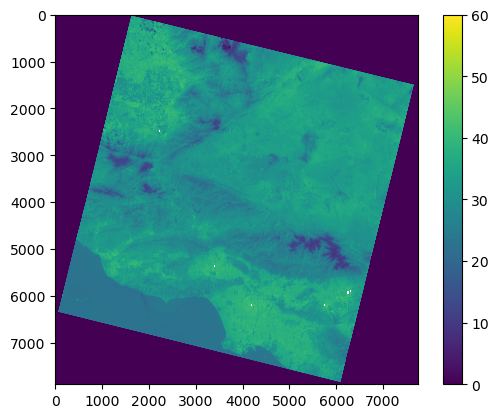

In [49]:
# Plot the 2020-04-14 BT data
plt.imshow(arr, vmin = 0, vmax = 60)
plt.colorbar()

In [50]:
# Load the 2020-08-20 BT data
fn =  fn_out = os.path.join('./data/', 'BT_20200820.tif')
arr = rasterio.open(fn).read(1)

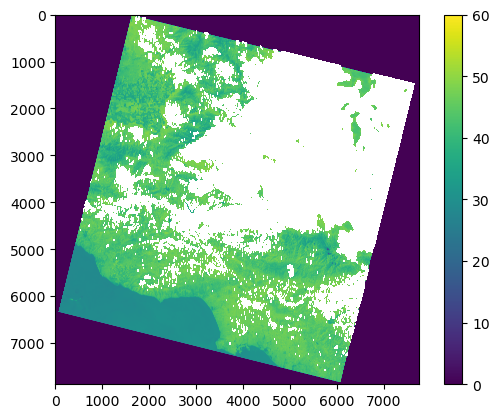

In [51]:
# Plot the 2020-08-20 BT data
plt.imshow(arr, vmin = 0, vmax = 60)
plt.colorbar()

In [52]:
# Calculate the difference between 2020-08-20 and 2020-04-14 BT data

# Load the 2020-04-14 BT data
fn = os.path.join('./data/', 'BT_20200414.tif')
arr0414 = rasterio.open(fn).read(1)

# Load the 2020-08-20 BT data
fn =  fn_out = os.path.join('./data/', 'BT_20200820.tif')
arr0820 = rasterio.open(fn).read(1)

In [53]:
arr0414.shape

(7891, 7751)

In [54]:
arr0820.shape 

(7881, 7761)

In [55]:
arr0415_n = arr0414[:7881,:]
arr0415_n.shape

(7881, 7751)

In [56]:
arr0820_n = arr0820[:,:7751]
arr0820_n.shape

(7881, 7751)

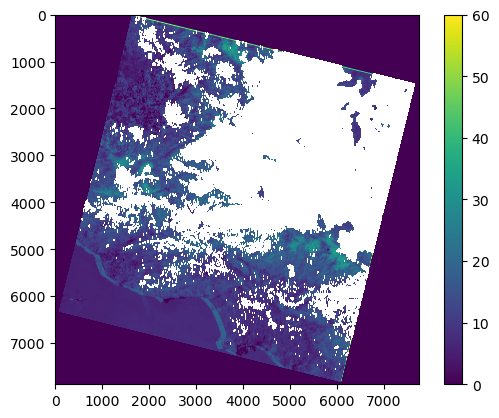

In [57]:
# Plot the difference between 2020-08-20 and 2020-04-14 BT data
dif = arr0820_n - arr0415_n

plt.imshow(dif, vmin = 0, vmax = 60)
plt.colorbar()

# Part 4


![Richmond](./assets/ndvi.png)

Vegetation in LA will be characterized by the [Normalized Difference Vegetation Index (NDVI)](https://www.usgs.gov/landsat-missions/landsat-normalized-difference-vegetation-index#:~:text=NDVI%20is%20used%20to%20quantify), which is a widely-used measure of “greenness” and higher values of NDVI indicate a greater amount of green vegetation within each neighborhood. From USGS (text is quoted):

NDVI is used to quantify vegetation greenness and is useful in understanding vegetation density and assessing changes in plant health. NDVI is calculated as a ratio between the red (R) and near infrared (NIR) values in traditional fashion: 
    
    (NIR - R) / (NIR + R)
    In Landsat 4-7, NDVI = (Band 4 – Band 3) / (Band 4 + Band 3).
    In Landsat 8-9, NDVI = (Band 5 – Band 4) / (Band 5 + Band 4).
 
The equations produce a bounded index of -1 to 1. <br>

Basically, NDVI use the ratio of red and near-red colors to see how green something on the ground is. This is because less green objects tend to be darker in the visable R spectrul (e.g. absorb a lot of red light) and bright in the NIR (relfect/emit a lot of NIR). That's why plants look great to us!


In [2]:
# Function to create NDVI from Landsat 8 raw DN

def ndvi(b4_fn, b5_fn, out_fn):
    """Funciton writes an NDVI image from Landsat 8. Will throw an error for 0 values in Landsat edges.
    Args:
        b4_fn = path to Landsat8 band 4 (red) geotif
        b5_fn = path to Landsat8 band 5 (NIR) geotif
        fn_out = path and name to write out ndvi file
    """
    
    # Get meta data to write file
    meta = rasterio.open(b4_fn).meta
    meta.update({'dtype': 'float32'})
    
    # Open the band data as arrays
    band4 = rasterio.open(b4_fn).read(1) #Red
    band5 = rasterio.open(b5_fn).read(1) #NIR
    
    # NDVI = (NIR — VIS)/(NIR + VIS) 
    ndvi = np.nan_to_num((band5 - band4)/(band5 + band4))
    ndvi = np.float32(ndvi) # reduce size
    
    # write our raster to disk
    with rasterio.open(out_fn, 'w', **meta) as out:
        out.write_band(1, ndvi)

    print('NDVI done')

### Process 2020-04-14 NDVI

In [1]:
# Set up file paths
data_in = os.path.join(file_path, 'landsat/Level1/LC08_L1TP_041036_20200414_20200423_01_T1')
b4 = os.path.join(data_in, 'LC08_L1TP_041036_20200414_20200423_01_T1_B4.TIF')
b5 = os.path.join(data_in, 'LC08_L1TP_041036_20200414_20200423_01_T1_B5.TIF')
fn_out = os.path.join('./data/', 'NDVI_20200414.tif')

NameError: name 'os' is not defined

In [6]:
# Process the data
ndvi(b4, b5, fn_out)

/tmp/ipykernel_2788037/1625411570.py:20: RuntimeWarning: divide by zero encountered in divide
  ndvi = np.nan_to_num((band5 - band4)/(band5 + band4))
/tmp/ipykernel_2788037/1625411570.py:20: RuntimeWarning: invalid value encountered in divide
  ndvi = np.nan_to_num((band5 - band4)/(band5 + band4))
/tmp/ipykernel_2788037/1625411570.py:21: RuntimeWarning: overflow encountered in cast
  ndvi = np.float32(ndvi) # reduce size


NDVI done


### Process 2020-08-20 NDVI

In [7]:
# Set up file paths
data_in = os.path.join(file_path, 'landsat/Level1/LC08_L1TP_041036_20200820_20200905_01_T1/')
b4 = os.path.join(data_in, 'LC08_L1TP_041036_20200820_20200905_01_T1_B4.TIF')
b5 = os.path.join(data_in, 'LC08_L1TP_041036_20200820_20200905_01_T1_B5.TIF')
fn_out = os.path.join('./data/','NDVI_20200820.tif')

In [8]:
# Process the data
ndvi(b4, b5, fn_out)

/tmp/ipykernel_2788037/1625411570.py:20: RuntimeWarning: invalid value encountered in divide
  ndvi = np.nan_to_num((band5 - band4)/(band5 + band4))


NDVI done


### On your own ...

In [9]:
# Load the 2020-04-14 NDVI data
fn_out = os.path.join('./data/', 'NDVI_20200414.tif')
ndvi_0414 = rasterio.open(fn_out).read(1)

In [10]:
ndvi_0414

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
# Plot the 2020-04-14 NDVI data


In [ ]:
# Load the 2020-08-20 NDVI data

In [ ]:
# Plot the 2020-08-20 NDVI data

In [ ]:
# Calculate the difference between 2020-08-20 and 2020-04-14 NDVI data

In [ ]:
# Plot the difference between 2020-08-20 and 2020-04-14 NDVI data

### Question 4: 
Given that the 2020-04-14 image is spring (e.g. wet) and the 2020-08-20 image is summer (e.g. dry) in LA, does the difference between 2020-08-20 and 2020-04-14 NDVI data make sense? Why or why not?

# Part 5

Now we need to estimate BT and NDVI for each neighborhood in LA. This requires using [rasters_stats](https://pythonhosted.org/rasterstats/) to calculate zonal statistics. In this case, we are going to do area-averaging of BT and NDVI. Doing so will add spatial uncertainty to our data because we are ascribing the same BT or NDVI value across an entire neigbhorhood (read about `all_touched` [here](https://pythonhosted.org/rasterstats/manual.html#zonal-statistics) as one example of possible error).

### Question 5:

What other issues of spatial uncertainty are introduced when overlaying vector data on raster data? Think about coastlines, reference systems, spatial resolution, etc. etc.  

In [ ]:
# Function to find the area average

def zonal(rst_in, polys_in, do_stats): 
    """Function will run zonal stats on a raster and a set of polygons. All touched is set to True by default. 
    
    Args:
        rst_in = file name/path of raster to run zonal stats on
        polys = either list of shape files (watersheds) or single shape file (countries)
        do_stats = stats to use, see rasterstats package for documention, (use sume)
    """
    
    # project landsat to polygons crs
    polys_in = polys_in.to_crs({'init' :'epsg:32611'}) # CRS of Landsat tifs
    
    # Run Zonal Stats
    zs_feats = zonal_stats(polys_in, rst_in, stats= do_stats, geojson_out=True, all_touched=True)
        
    # Turn into geo data frame and rename column
    zgdf = gpd.GeoDataFrame.from_features(zs_feats, crs=polys_in.crs)
    
    return zgdf

In [ ]:
# Get Polygon Geometry 
polys_in =neighborhoods[['Name', 'geometry']]

In [ ]:
# Run Zonal stats - Throws error for Catalina Island which isn't in the scene 
rst_in = os.path.join('./data/','NDVI_20200414.tif')
ndvi_spring = zonal(rst_in, polys_in, 'mean')
ndvi_spring.rename(columns = {'mean' : 'NDVI_SPRING'}, inplace = True)

rst_in = os.path.join('./data/', 'NDVI_20200820.tif')
ndvi_summer = zonal(rst_in, polys_in, 'mean')
ndvi_summer.rename(columns = {'mean' : 'NDVI_SUMMER'}, inplace = True)

rst_in = os.path.join('./data/', 'BT_20200414.tif')
temp_spring = zonal(rst_in, polys_in, 'mean')
temp_spring.rename(columns = {'mean' : 'TEMP_SPRING'}, inplace = True)

rst_in = os.path.join('./data/', 'BT_20200820.tif')
temp_summer = zonal(rst_in, polys_in, 'mean')
temp_summer.rename(columns = {'mean' : 'TEMP_SUMMER'}, inplace = True)

In [ ]:
# Check out one of the dataframes
temp_summer.head()

### Merge Final Data

In [ ]:
# Make a list of the zonal stats data frames
df_list = [ndvi_spring, ndvi_summer, temp_spring, temp_summer]

# Loop and merge the data frames onto 
for df in df_list:
    df.rename(columns = {'Name' : 'NEIGHBORHOOD'}, inplace = True)
    df_out = df_out.merge(df.iloc[:,1:3], on = 'NEIGHBORHOOD', how = 'left')

In [ ]:
# Check out your final data
df_out.head()

In [ ]:
# Write CSV
fn_out = os.path.join('./data/','LA-all-SE-ENV-data')
df_out.to_csv(fn_out+'.csv', index = False)

In [ ]:
# Write shape file
gdf_out = neighborhoods[['Name','geometry']] # get name and geom
gdf_out.rename(columns={'Name':'NEIGHBORHOOD'}, inplace=True) # rename col
gdf_out = df_out.merge(gdf_out, on = 'NEIGHBORHOOD', how = 'right') # merge
gdf_out = gpd.GeoDataFrame(gdf_out) # cast to GeoPandas DF
gdf_out.to_file(fn_out+'.shp', index = False) # Write Shape file

# Part 6

Finally, we have our dataset! Now, on your own, using `seaborn` and/or `matplotlib`, you will make a series of bi-variate plots where you look at the relationship between socioeconomic status, BT, and NDVI for LA. You will answer a series of questions as well.

### On your own ...

In [ ]:
# plot the relationship between spring NDVI and spring BT

In [ ]:
# plot the relationship between summer NDVI and spring BT

### Question 6: 
At the neighborhood-level, how well correlated are NDVI and BT? Is the relationship stronger in spring or summer?
Why?

In [ ]:
# Now make 3-5 plots exploring the relationship between the various demographic and SE datasets. 

### Question 7: 
Which demographic and SE data are most well correlated at the neighbhorhood level? Why?

In [ ]:
# Now make 3-5 plots exploring the relationship between the various demographic and SE datasets and BT and NDVI?

### Question 8: 
Which demographic and SE data are most well correlated with BT and NDVI at the neighbhorhood level? Does BT or NDVI correlate better with demographic and SE data? Why? Which correlations, or lack of correlation, are most surprising?